In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [19]:
pd.options.display.max_rows = 20

# WallStreet Bets

Link do subreddit: https://www.reddit.com/r/wallstreetbets/

In [2]:
url = 'https://tradestie.com/api/v1/apps/reddit'
response = requests.get(url)

acoes = pd.DataFrame(response.json())
acoes

,no_of_comments,sentiment,sentiment_score,ticker
0,59,Bearish,-0.020,NVDA
1,58,Bullish,0.070,INTC
2,31,Bullish,0.315,AI
3,17,Bullish,0.111,AAPL
4,13,Bullish,0.109,SMCI
5,9,Bullish,0.169,PLTR
6,7,Bearish,-0.079,AMZN
7,7,Bearish,-0.027,MSFT
8,6,Bullish,0.054,TSLA
9,6,Bullish,0.150,AMD


In [5]:
tickers = acoes[acoes['sentiment_score'] > 0.1]['ticker'].tolist()
tickers

['AI',
 'AAPL',
 'SMCI',
 'PLTR',
 'AMD',
 'TLT',
 'RE',
 'WOW',
 'GIS',
 'TSM',
 'API',
 'FAST',
 'PDT',
 'JP',
 'GOOD',
 'DG',
 'AAL',
 'TECH',
 'TDOC']

# Yahoo Finance

In [6]:
import yfinance as yf

data = yf.download(tickers, start="2021-01-01")
data

[*********************100%***********************]  19 of 19 completed

2 Failed downloads:
['RE', 'JP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price                     Adj Close                                      \
Ticker                          AAL        AAPL          AI         AMD   
Date                                                                      
2021-01-04 00:00:00+00:00     15.13  126.683441  120.010002   92.300003   
2021-01-05 00:00:00+00:00     15.43  128.249725  122.169998   92.769997   
2021-01-06 00:00:00+00:00     15.52  123.932632  113.400002   90.330002   
2021-01-07 00:00:00+00:00     15.38  128.161667  133.580002   95.160004   
2021-01-08 00:00:00+00:00     15.13  129.267822  143.630005   94.580002   
...                             ...         ...         ...         ...   
2024-09-11 00:00:00+00:00     10.77  222.660004   21.410000  149.860001   
2024-09-12 00:00:00+00:00     10.88  222.770004   22.870001  150.770004   
2024-09-13 00:00:00+00:00     10.69  222.500000   23.000000  152.309998   
2024-09-16 00:00:00+00:00     10.81  216.320007   23.280001  152.080002   
2024-09-17 00:00:00+00:00     11.17  216.789993   23.330000  150.820007   

Price                                                                   \
Ticker                           API          DG       FAST        GIS   
Date                                                                     
2021-01-04 00:00:00+00:00  39.779999  201.199280  43.350819  52.371353   
2021-01-05 00:00:00+00:00  42.090000  198.340225  43.923981  52.424587   
2021-01-06 00:00:00+00:00  43.520000  206.572021  44.669991  52.291500   
2021-01-07 00:00:00+00:00  43.009998  208.884201  45.224953  51.861935   
2021-01-08 00:00:00+00:00  43.619999  207.051727  46.171120  50.474773   
...                              ...         ...        ...        ...   
2024-09-11 00:00:00+00:00   1.970000   80.570000  69.209999  73.120003   
2024-09-12 00:00:00+00:00   1.990000   83.209999  69.820000  73.010002   
2024-09-13 00:00:00+00:00   1.980000   84.750000  69.820000  73.709999   
2024-09-16 00:00:00+00:00   1.980000   85.750000  70.089996  74.629997   
2024-09-17 00:00:00+00:00   1.985000   86.010002  70.589996  74.500000   

Price                                     ... Volume                        \
Ticker                          GOOD  JP  ...     JP     PDT      PLTR  RE   
Date                                      ...                                
2021-01-04 00:00:00+00:00  13.155275 NaN  ...    NaN  109100  44970400 NaN   
2021-01-05 00:00:00+00:00  13.199950 NaN  ...    NaN  154500  29050400 NaN   
2021-01-06 00:00:00+00:00  13.378626 NaN  ...    NaN  153700  32732900 NaN   
2021-01-07 00:00:00+00:00  13.296731 NaN  ...    NaN  160600  32240000 NaN   
2021-01-08 00:00:00+00:00  13.304178 NaN  ...    NaN  112500  41313800 NaN   
...                              ...  ..  ...    ...     ...       ...  ..   
2024-09-11 00:00:00+00:00  15.430000 NaN  ...    NaN   90200  68302300 NaN   
2024-09-12 00:00:00+00:00  15.720000 NaN  ...    NaN  126500  54391800 NaN   
2024-09-13 00:00:00+00:00  16.030001 NaN  ...    NaN   74500  49727200 NaN   
2024-09-16 00:00:00+00:00  16.129999 NaN  ...    NaN   68500  74767300 NaN   
2024-09-17 00:00:00+00:00  16.219999 NaN  ...    NaN   87766  61921766 NaN   

Price                                                                      \
Ticker                        SMCI      TDOC     TECH       TLT       TSM   
Date                                                                        
2021-01-04 00:00:00+00:00   242500   2552800   523200  13152900  11262100   
2021-01-05 00:00:00+00:00   215600   2086200   609600  10458100  10583600   
2021-01-06 00:00:00+00:00   334700   3629300  1153200  22827300  10609300   
2021-01-07 00:00:00+00:00   620900   5913100   452800  14651900  13556100   
2021-01-08 00:00:00+00:00   261800   4235000   744000  13622500  18976800   
...                            ...       ...      ...       ...       ...   
2024-09-11 00:00:00+00:00  7337600   3959600   993700  39497100  15059500   
2024-09-12 00:00:00+00:00  4940700   4233900   95

### Podemos baixar também apenas uma ação

Se quisermos uma ação da BOVESPA, podemos usar o código da ação + .SA

In [7]:
petrobras = yf.download('PETR4.SA', start="2010-01-01")
petrobras

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,36.950001,37.320000,36.820000,37.320000,10.068062,13303600
2010-01-05,37.380001,37.430000,36.799999,37.000000,9.981732,21396400
2010-01-06,36.799999,37.500000,36.799999,37.500000,10.116626,18720600
2010-01-07,37.270000,37.450001,37.070000,37.150002,10.022202,10964600
2010-01-08,37.160000,37.389999,36.860001,36.950001,9.968246,14624200
...,...,...,...,...,...,...
2024-09-11,37.759998,37.830002,36.869999,37.290001,37.290001,32907000
2024-09-12,37.290001,37.320000,36.750000,36.869999,36.869999,22103300
2024-09-13,37.110001,37.549999,36.590000,36.700001,36.700001,34729600


<Figure size 2000x1000 with 0 Axes>

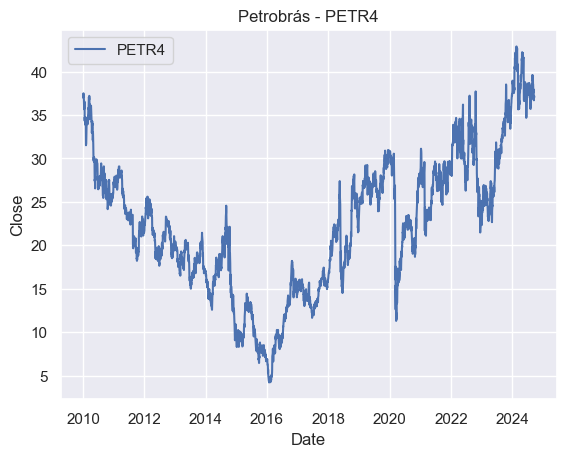

<Figure size 2000x1000 with 0 Axes>

In [9]:
sns.set_theme(style='darkgrid')
sns.lineplot(data=petrobras, x=petrobras.index, y='Close', label='PETR4').set(title='Petrobrás - PETR4')
plt.figure(figsize=(20,10))

Qual e quando foi o preço máximo da ação? E o mais baixo? Qual a média por ano? e por mês?

In [10]:
petrobras[petrobras['Close'] == petrobras['Close'].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-19,42.759998,42.939999,42.560001,42.900002,37.791435,12826700


In [11]:
petrobras[petrobras['Close'] == petrobras['Close'].min()]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-26,4.23,4.31,4.12,4.2,1.34814,71933300


In [13]:
petrobras['Close'].resample('YE').mean()

Date
2010-12-31    29.715101
2011-12-31    23.824606
2012-12-31    21.316245
2013-12-31    18.246774
2014-12-31    16.679153
2015-12-31     9.798008
2016-12-31    10.772610
2017-12-31    14.605276
2018-12-31    21.000081
2019-12-31    27.247016
2020-12-31    22.303710
2021-12-31    26.861943
2022-12-31    30.669080
2023-12-31    29.688710
2024-12-31    38.554199
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

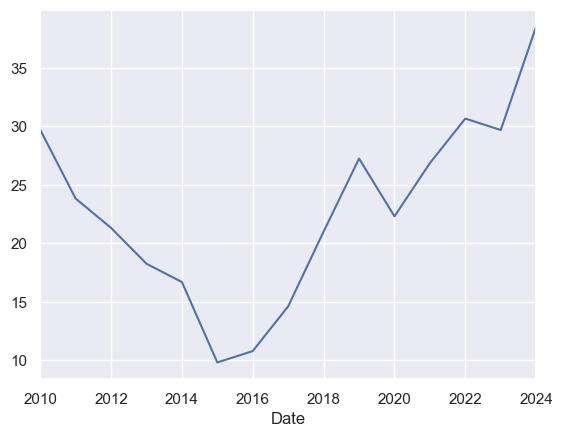

In [15]:
petrobras['Close'].resample('YE').mean().plot()

In [16]:
petrobras['Close'].resample('M').mean()

/var/folders/ns/bgqhy0js3djctln1yxdwt23r0000gn/T/ipykernel_10185/3087971565.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  petrobras['Close'].resample('M').mean()


Date
2010-01-31    35.846316
2010-02-28    33.616666
2010-03-31    35.949566
2010-04-30    34.169500
2010-05-31    29.050952
                ...    
2024-05-31    38.935238
2024-06-30    36.907000
2024-07-31    37.969565
2024-08-31    37.680909
2024-09-30    37.693333
Freq: ME, Name: Close, Length: 177, dtype: float64

<Axes: xlabel='Date'>

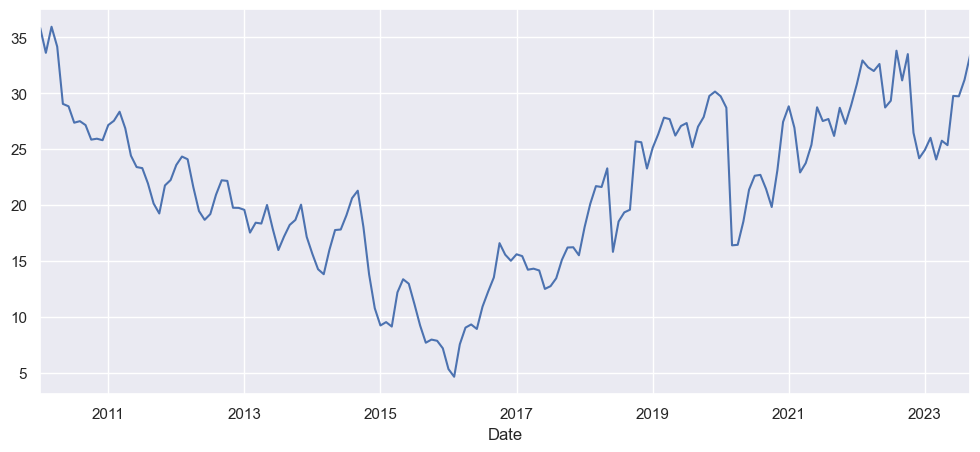

In [16]:
petrobras['Close'].resample('M').mean().plot()

In [20]:
petrobras['Close'].resample('W').mean()


Date
2010-01-10    37.184000
2010-01-17    36.182000
2010-01-24    35.492001
2010-01-31    34.197500
2010-02-07    33.252000
                ...    
2024-08-25    37.760000
2024-09-01    39.382000
2024-09-08    38.384000
2024-09-15    37.230000
2024-09-22    37.125000
Freq: W-SUN, Name: Close, Length: 768, dtype: float64

<Axes: xlabel='Date'>

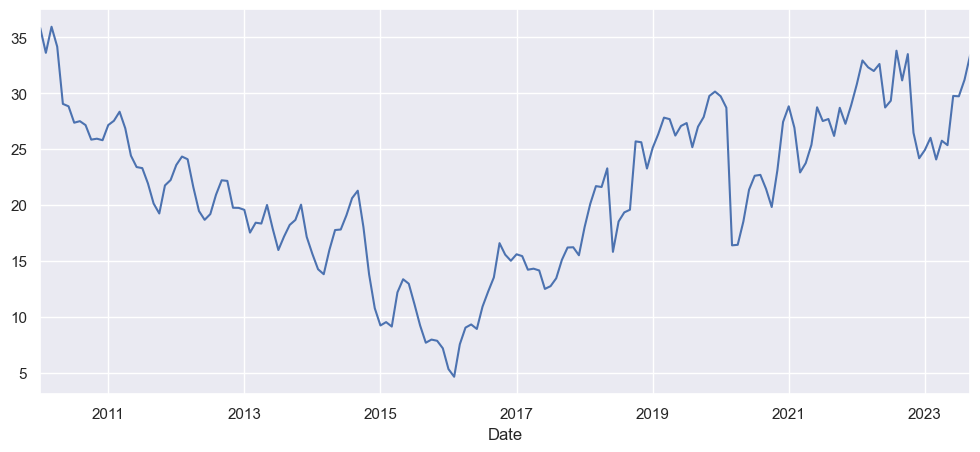

In [18]:
petrobras['Close'].resample('M').mean().plot()


### Cálculo de médias móveis

In [22]:
petrobras['Close'].rolling(7).mean()

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2024-09-11    37.928571
2024-09-12    37.691429
2024-09-13    37.428571
2024-09-16    37.272857
2024-09-17    37.200000
Name: Close, Length: 3654, dtype: float64

<Axes: xlabel='Date'>

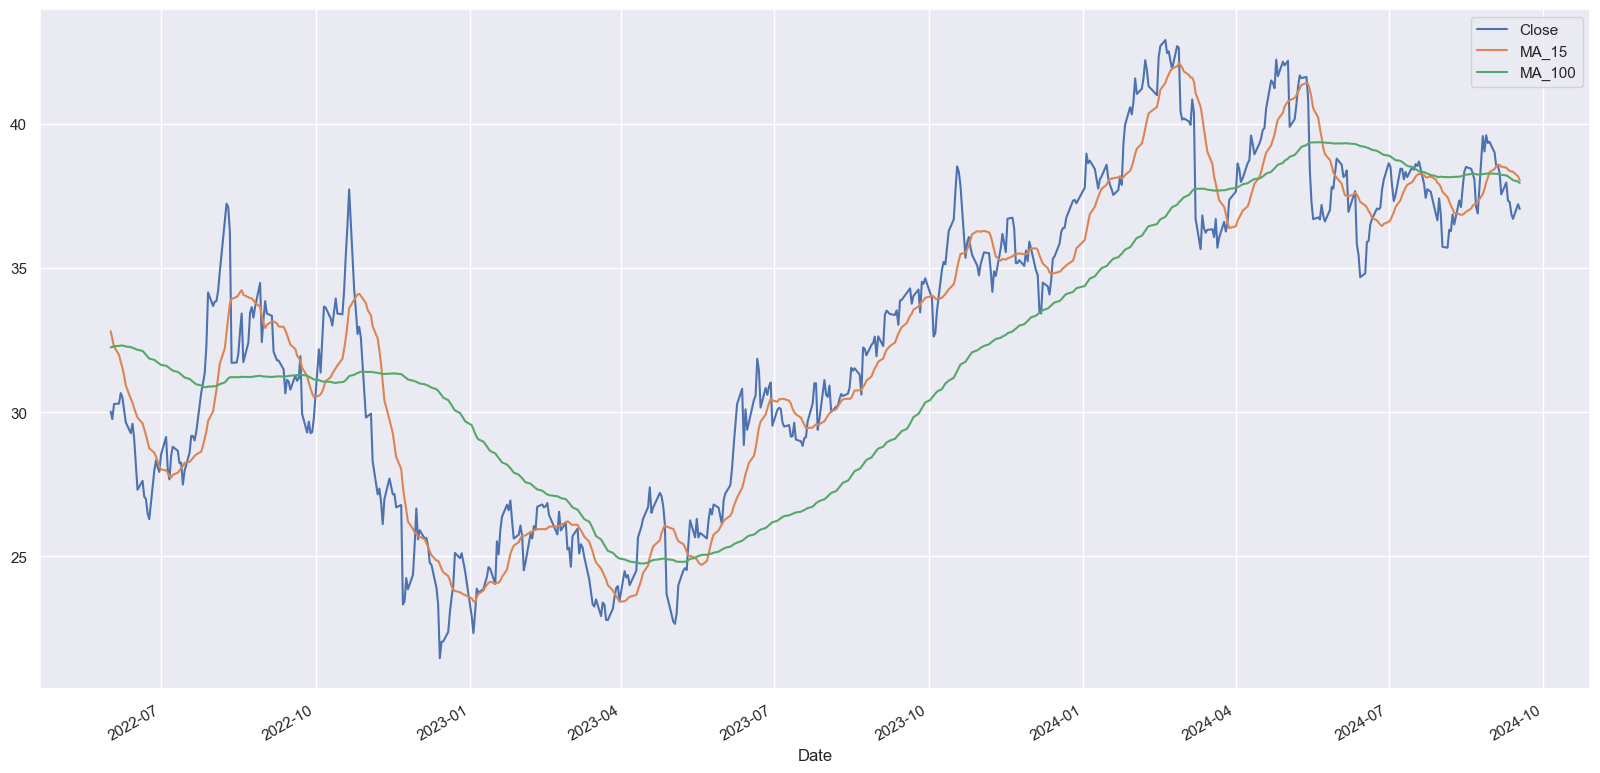

In [29]:
petrobras['MA_15'] = petrobras['Close'].rolling(15).mean()
petrobras['MA_100'] = petrobras['Close'].rolling(100).mean()

petrobras_2206 = petrobras[petrobras.index >= '2022-06-01']
petrobras_2206[['Close', 'MA_15', 'MA_100']].plot(figsize=(20,10))

### Cálculo de médias móveis exponenciais

In [30]:
petrobras['Close'].ewm(span=7, adjust=False).mean()

Date
2010-01-04    37.320000
2010-01-05    37.240000
2010-01-06    37.305000
2010-01-07    37.266250
2010-01-08    37.187188
                ...    
2024-09-11    37.851042
2024-09-12    37.605781
2024-09-13    37.379336
2024-09-16    37.337002
2024-09-17    37.262752
Name: Close, Length: 3654, dtype: float64

/var/folders/ns/bgqhy0js3djctln1yxdwt23r0000gn/T/ipykernel_10185/2777173616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrobras_2206['EMA_15'] = petrobras['Close'].ewm(span=15, adjust=False).mean()
/var/folders/ns/bgqhy0js3djctln1yxdwt23r0000gn/T/ipykernel_10185/2777173616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrobras_2206['EMA_50'] = petrobras['Close'].ewm(span=50, adjust=False).mean()


<Axes: xlabel='Date'>

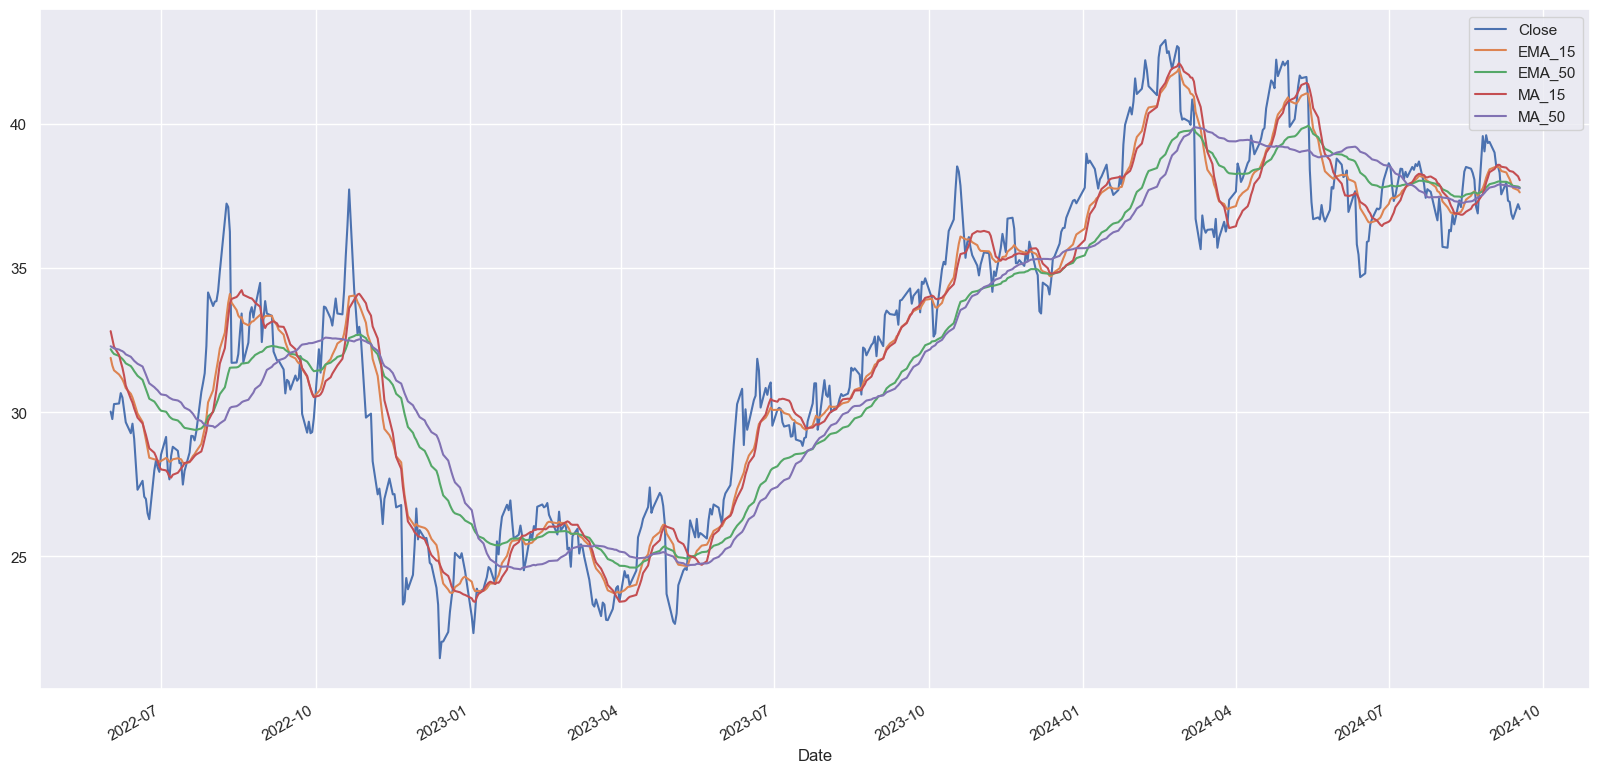

In [32]:
petrobras_2206['EMA_15'] = petrobras['Close'].ewm(span=15, adjust=False).mean()
petrobras_2206['EMA_50'] = petrobras['Close'].ewm(span=50, adjust=False).mean()

petrobras_2206[['Close', 'EMA_15', 'EMA_50', 'MA_15', 'MA_50']].plot(figsize=(20,10))

### Cálculo de mudança percentual

In [33]:
petrobras['Close'].resample('Y').mean().pct_change()

/var/folders/ns/bgqhy0js3djctln1yxdwt23r0000gn/T/ipykernel_10185/860479310.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  petrobras['Close'].resample('Y').mean().pct_change()


Date
2010-12-31         NaN
2011-12-31   -0.198232
2012-12-31   -0.105284
2013-12-31   -0.143997
2014-12-31   -0.085912
2015-12-31   -0.412560
2016-12-31    0.099469
2017-12-31    0.355779
2018-12-31    0.437842
2019-12-31    0.297472
2020-12-31   -0.181426
2021-12-31    0.204371
2022-12-31    0.141730
2023-12-31   -0.031966
2024-12-31    0.298615
Freq: YE-DEC, Name: Close, dtype: float64

/var/folders/ns/bgqhy0js3djctln1yxdwt23r0000gn/T/ipykernel_10185/524791616.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  petrobras['Close'].resample('Y').mean().pct_change().plot()


<Axes: xlabel='Date'>

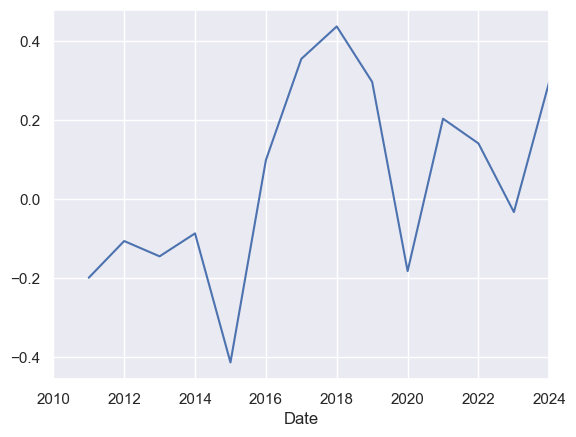

In [34]:
petrobras['Close'].resample('Y').mean().pct_change().plot()

In [35]:
petrobras['Close'].resample('M').mean().pct_change()

/var/folders/ns/bgqhy0js3djctln1yxdwt23r0000gn/T/ipykernel_10185/2478136773.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  petrobras['Close'].resample('M').mean().pct_change()


Date
2010-01-31         NaN
2010-02-28   -0.062200
2010-03-31    0.069397
2010-04-30   -0.049516
2010-05-31   -0.149799
                ...   
2024-05-31   -0.023412
2024-06-30   -0.052093
2024-07-31    0.028790
2024-08-31   -0.007602
2024-09-30    0.000330
Freq: ME, Name: Close, Length: 177, dtype: float64

<Axes: xlabel='Date'>

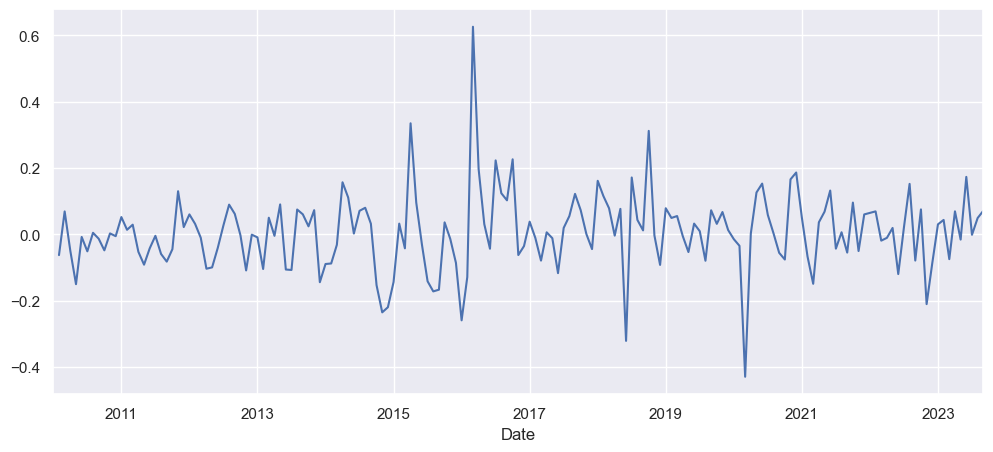

In [46]:
petrobras['Close'].resample('M').mean().pct_change().plot()

<Axes: xlabel='Date'>

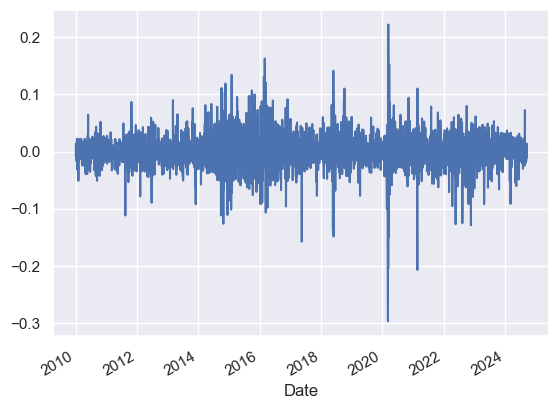

In [36]:
petrobras['Close'].pct_change().plot()
